In [1]:
from pythtb import TBModel, WFArray, Mesh, Lattice
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ssh(v, w):
    lat_vecs = [[1]]
    orb_vecs = [[-1 / 4], [1 / 4]]
    lat = Lattice(lat_vecs, orb_vecs, periodic_dirs=[0])
    my_model = TBModel(lat)

    my_model.set_hop(v, 0, 1, [0])
    my_model.set_hop(w, 1, 0, [1])

    return my_model

(<Figure size 800x800 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

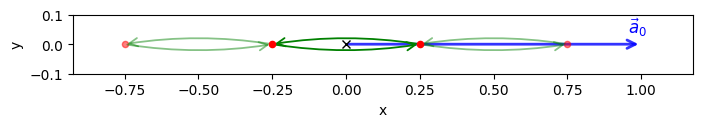

In [3]:
model = ssh(1, 1 / 2)
model.visualize()

In [4]:
t = 1
n_cells = 30
n_delta = 101
delta_values = np.linspace(-1, 1, n_delta)

evals_d = []
evecs_d = []
for delta in delta_values:
    v = t + delta
    w = t - delta
    finite_model = ssh(v, w).cut_piece(n_cells, 0)
    evals, evecs = finite_model.solve_ham(return_eigvecs=True)
    evals_d.append(evals)
    evecs_d.append(evecs)

Text(0.5, 1.0, 'Edge state density at $\\delta=-0.200$')

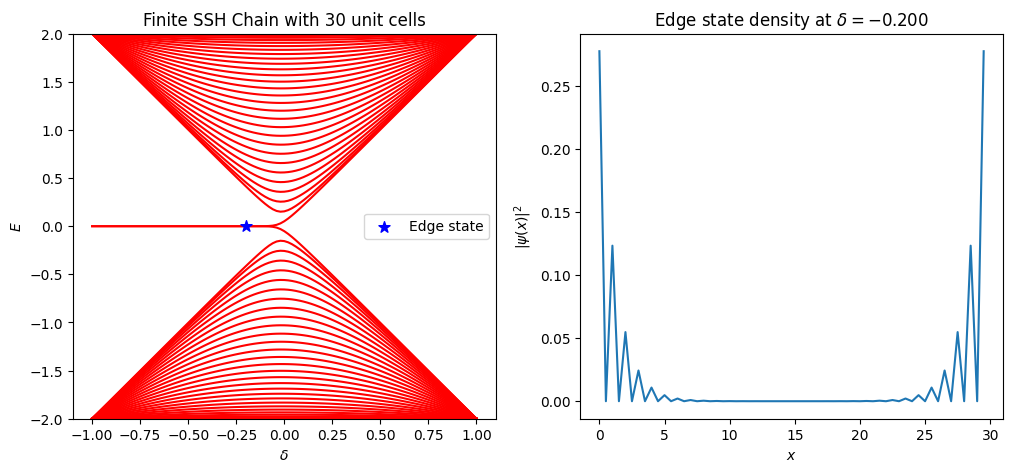

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the eigenvalues
ax1.plot(delta_values, evals_d, c="r")

ax1.set_title(f"Finite SSH Chain with {n_cells} unit cells")
ax1.set_xlabel(r"$\delta$")
ax1.set_ylabel(r"$E$")
ax1.set_ylim(-2, 2)

# Plot edge state density
band_idx = n_cells
delta_idx = 40
ax1.scatter(
    delta_values[delta_idx],
    evals_d[delta_idx][band_idx],
    color="b",
    s=70,
    marker="*",
    label="Edge state",
    zorder=2,
)
ax1.legend()
density = np.abs(evecs_d[delta_idx][band_idx, :]) ** 2
x_position = np.arange(len(density)) / 2
ax2.plot(x_position, density)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$|\psi(x)|^2$")
ax2.set_title(rf"Edge state density at $\delta={delta_values[delta_idx]:.3f}$")

In [6]:
nk = 100
mesh = Mesh(dim_k=1, axis_types=["k"])
mesh.build_grid(shape=(nk,), gamma_centered=True)

v = 1.0
model_triv = ssh(v, 0.2)
model_top = ssh(v, 1.2)
lattice = model_triv.lattice

wfa_triv = WFArray(lattice, mesh)
wfa_triv.solve_model(model_triv)
P_triv = wfa_triv.berry_phase(0, [0]) / (2 * np.pi)

wfa_top = WFArray(model_top.lattice, mesh)
wfa_top.solve_model(model_top)
P_top = wfa_top.berry_phase(0, [0]) / (2 * np.pi)

print(f"Polarization |w|<|v|: {P_triv:.3f}")
print(f"Polarization |w|>|v|: {P_top:.3f}")

Polarization |w|<|v|: -0.000
Polarization |w|>|v|: 0.500
